In [150]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [151]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

# Import OpenCV
import cv2
from os import listdir
from os.path import isfile, join 

In [152]:
subsets = ['train','valid','test']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']


In [153]:
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Mun/Spring2020/Course_Study/9804 (ImageProcessingandApplications)/Project/Code/data')

In [154]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

In [155]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\data;

Test: LabelList (38 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\data

In [156]:
print(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


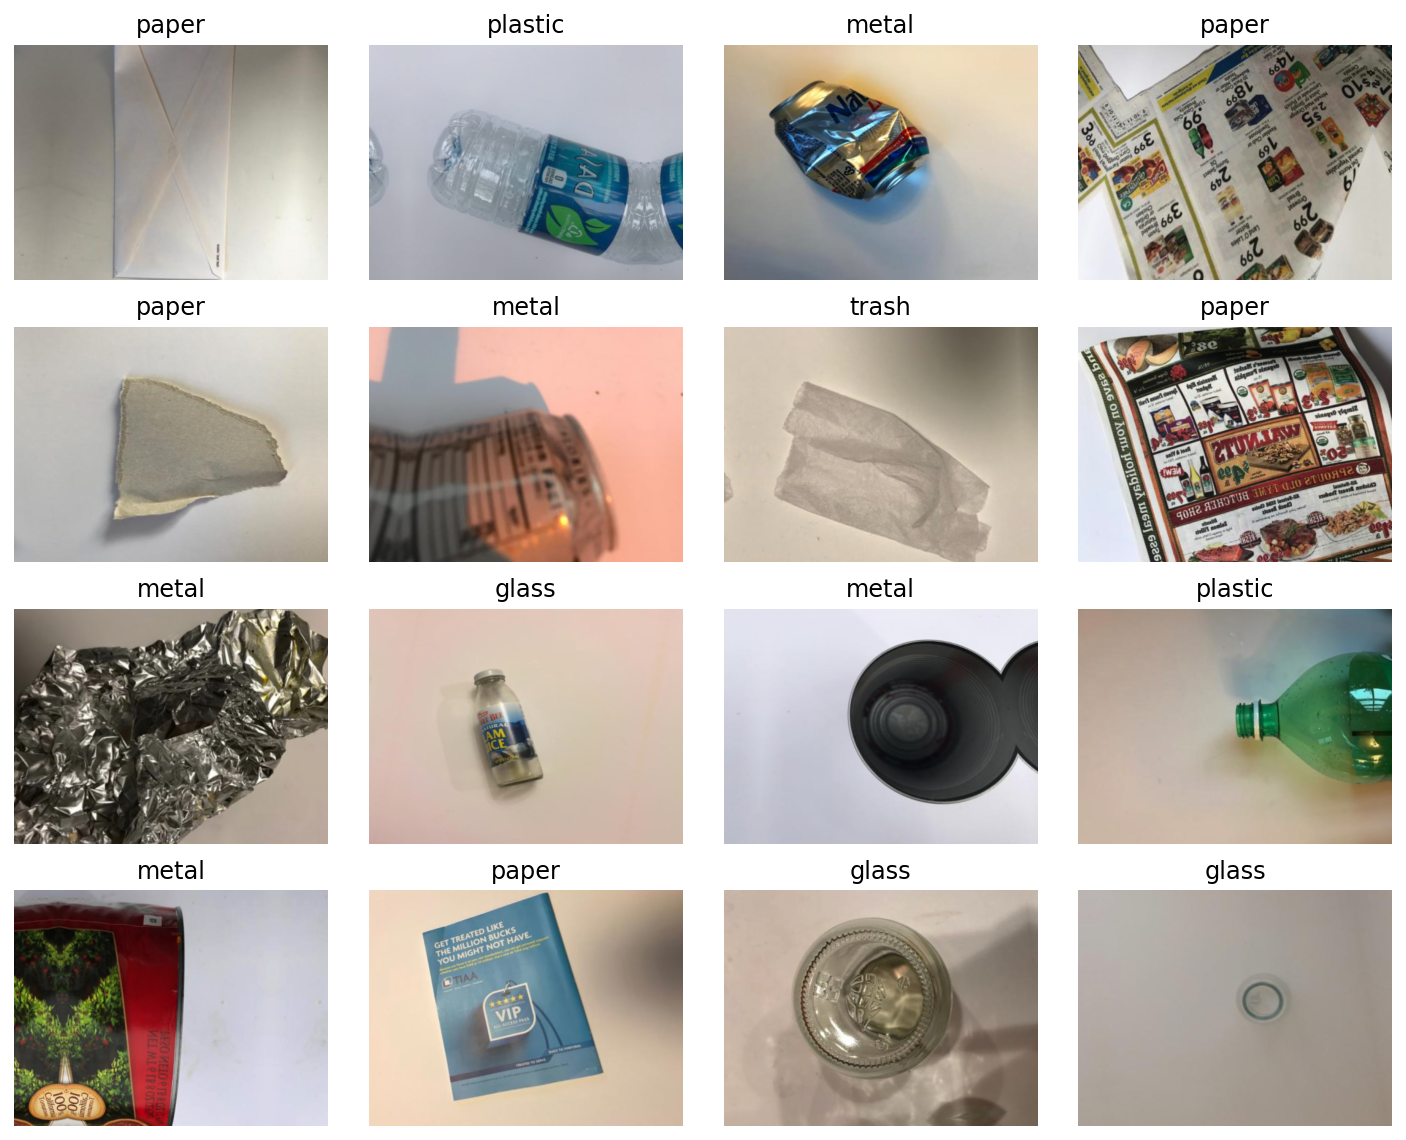

In [157]:
data.show_batch(rows=4,figsize=(10,8))

In [158]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy,error_rate])

In [159]:
# learn.model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.15E-02
Min loss divided by 10: 3.02E-03


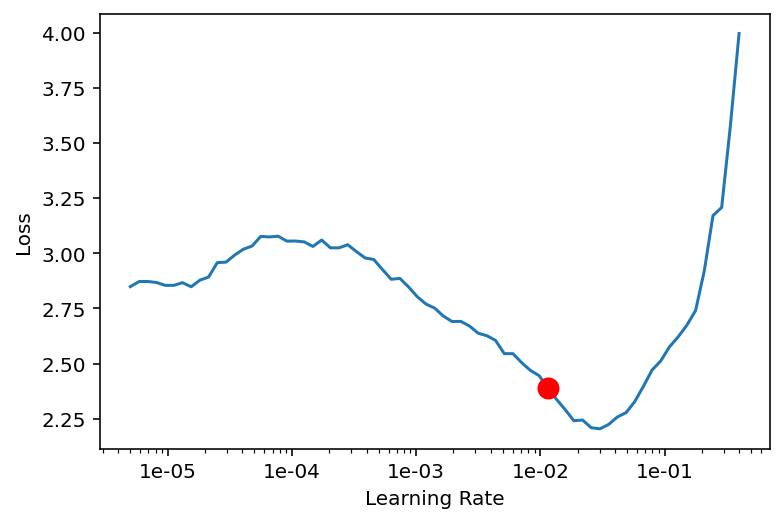

In [160]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot(suggestion=True)

In [161]:
learn.fit_one_cycle(2,max_lr=5.13e-03)

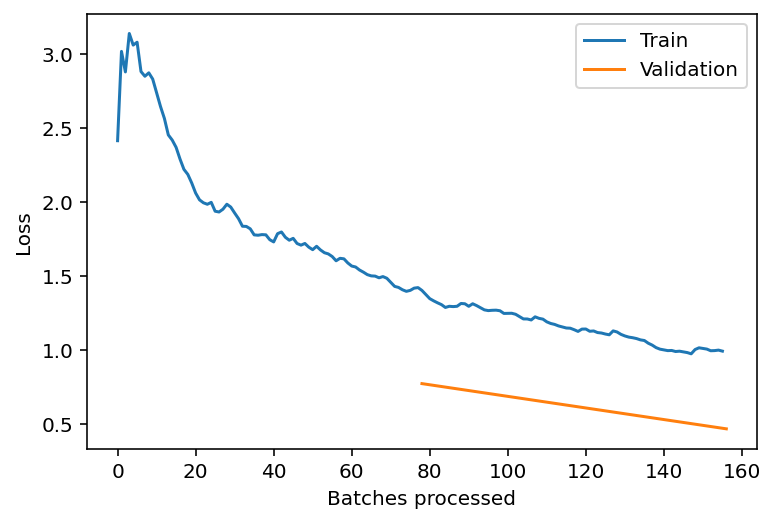

In [162]:
learn.recorder.plot_losses()

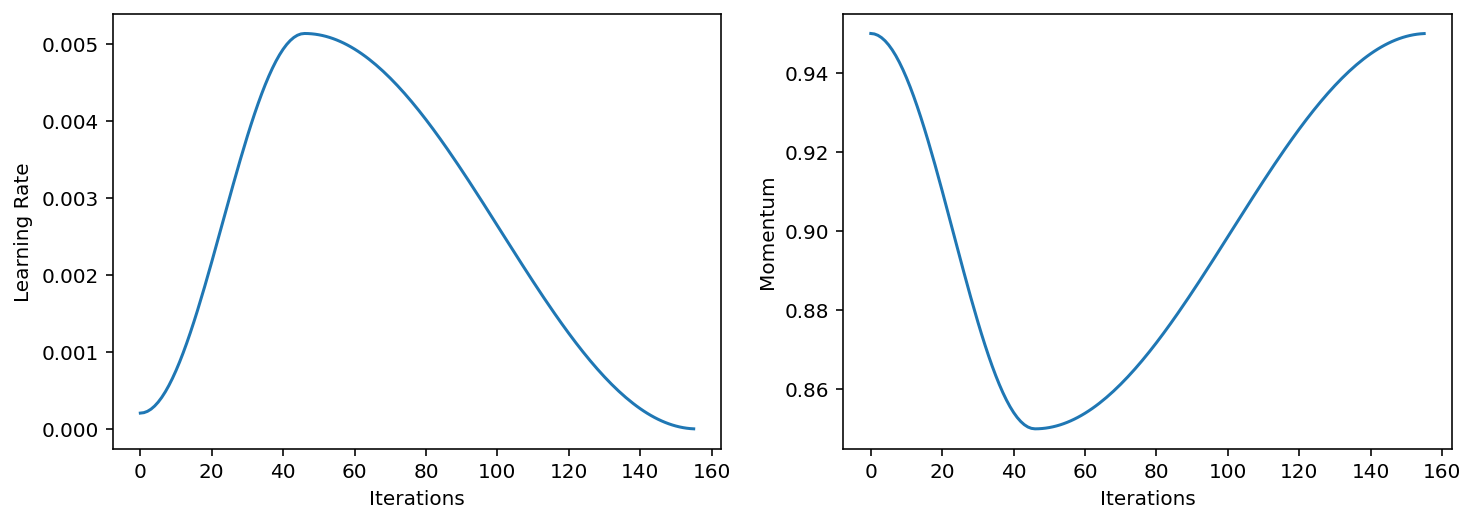

In [163]:
learn.recorder.plot_lr(show_moms=True)

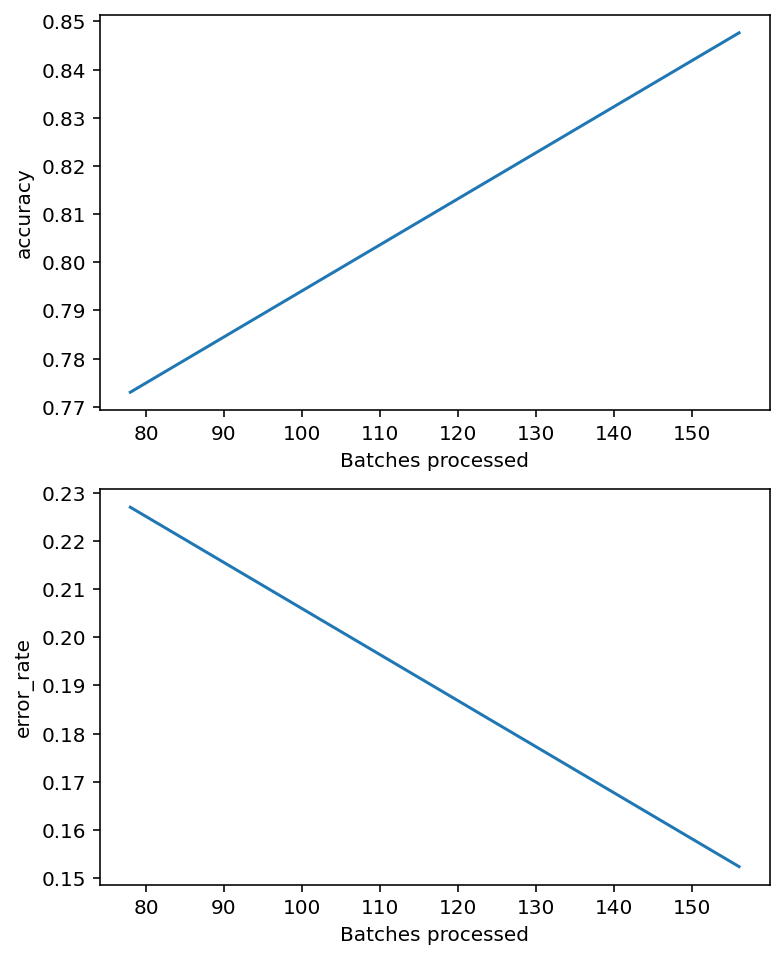

In [164]:
learn.recorder.plot_metrics()

In [165]:
# VIsualizing most incorrect images

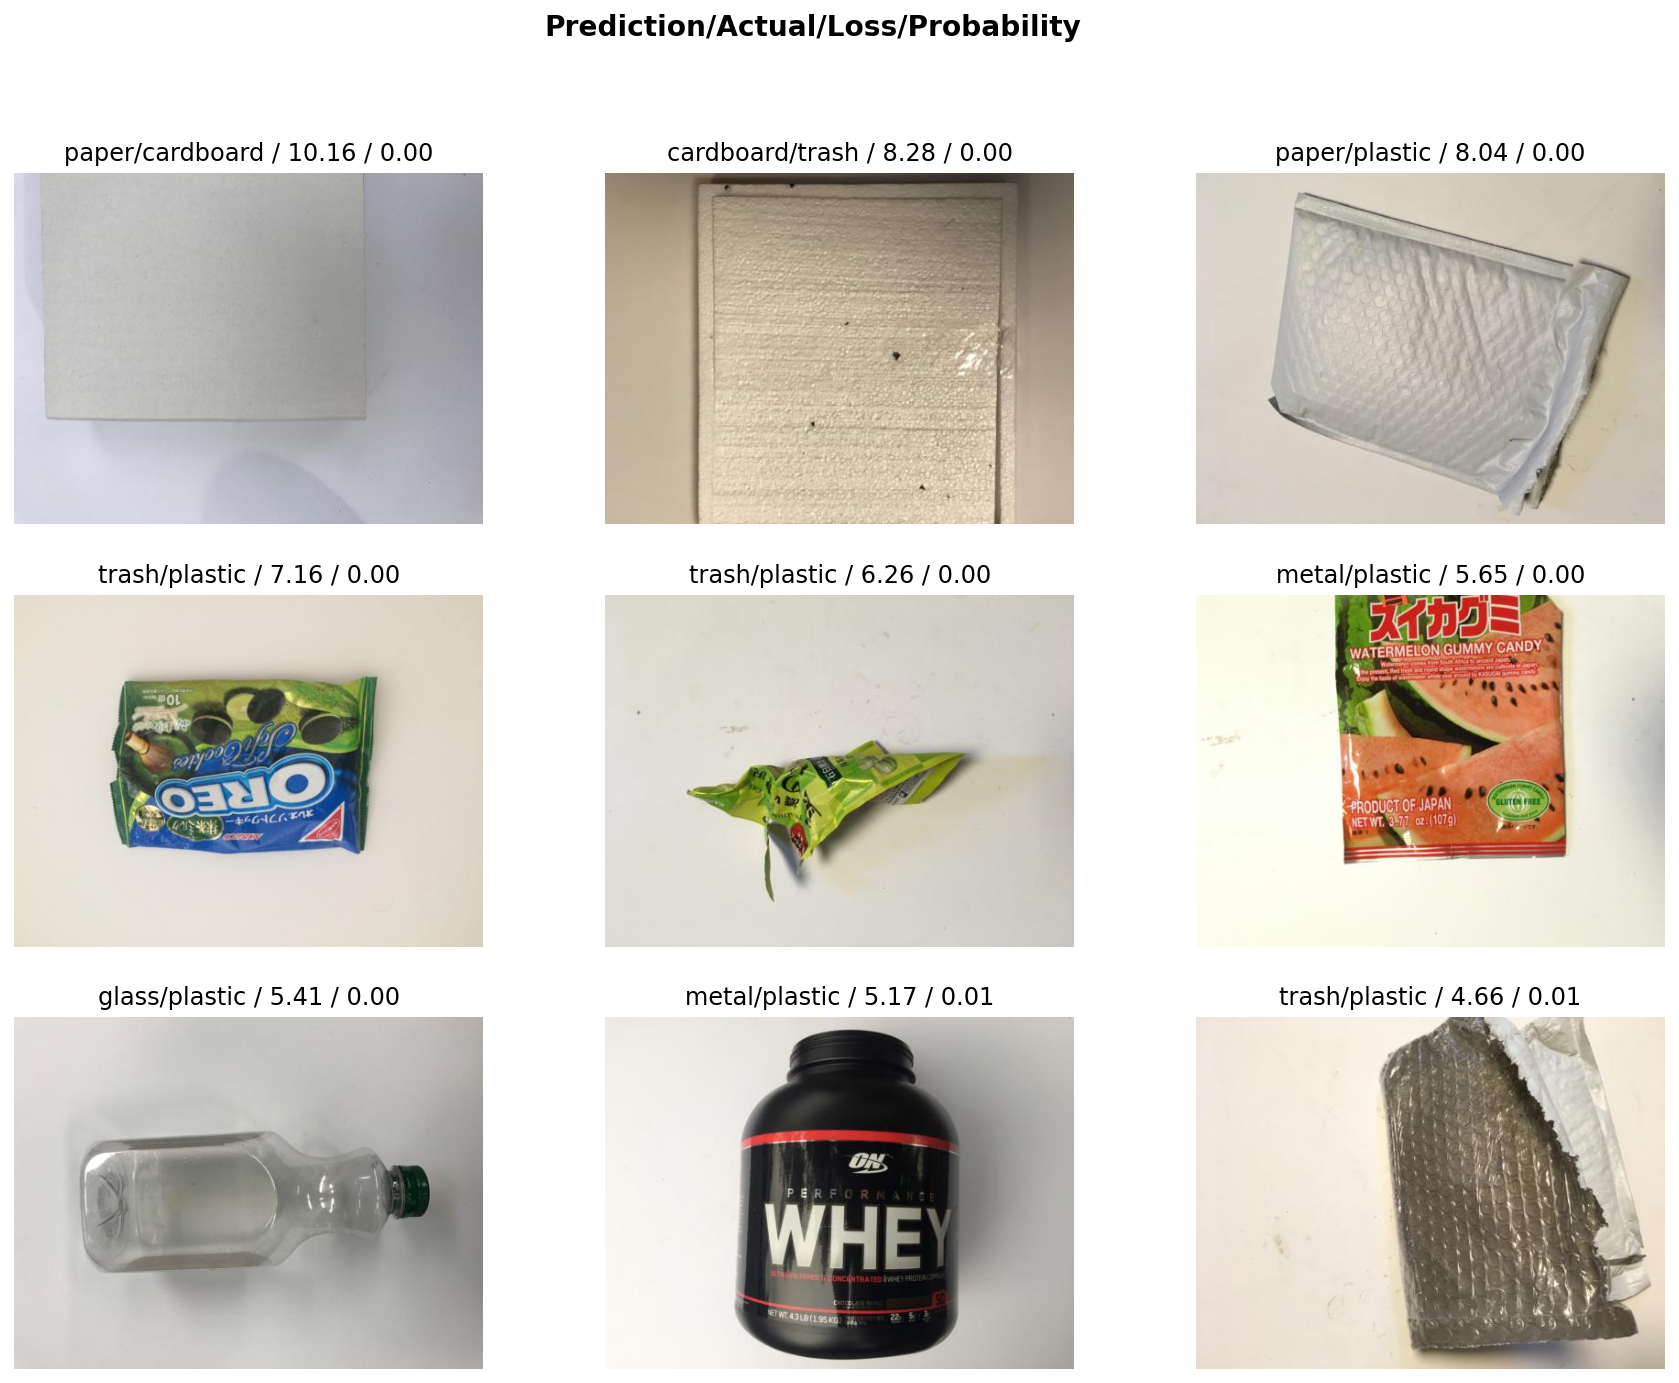

In [166]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))

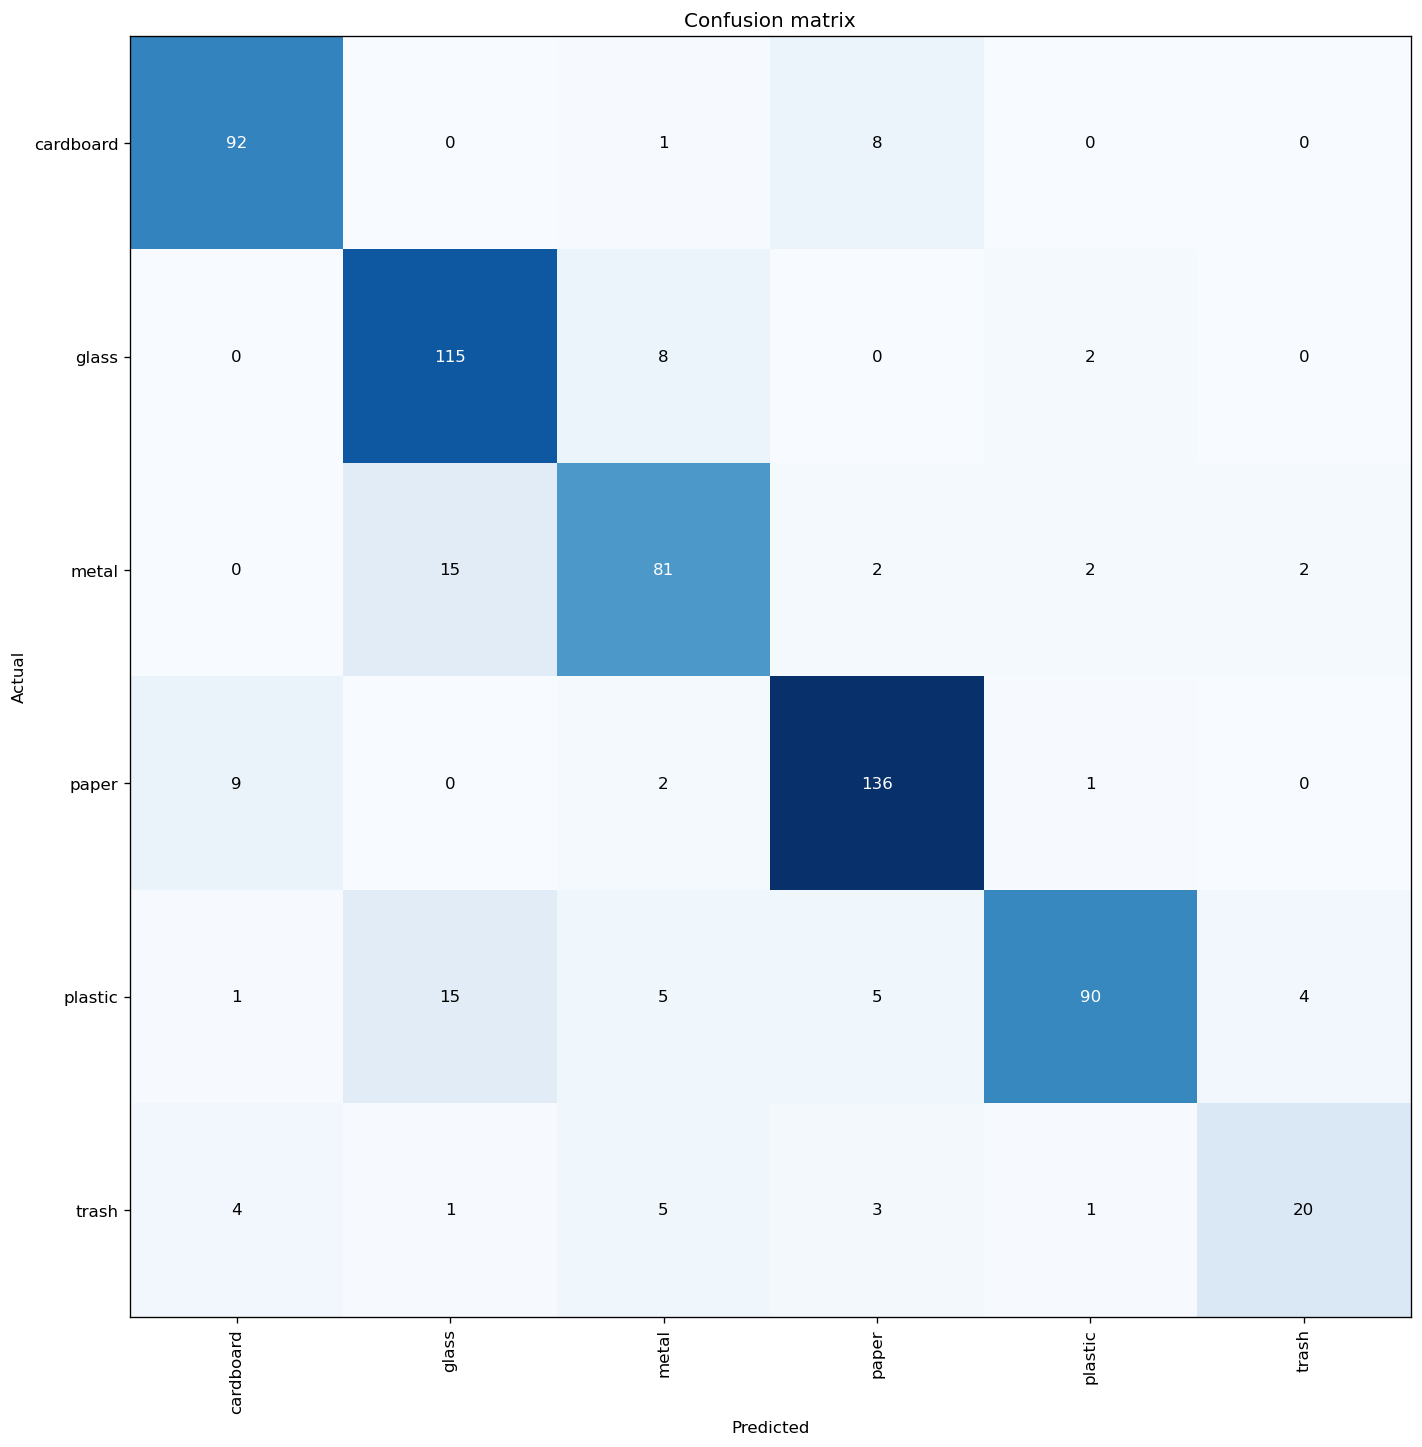

In [167]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [168]:
interp.most_confused(min_val=2)

[('metal', 'glass', 15),
 ('plastic', 'glass', 15),
 ('paper', 'cardboard', 9),
 ('cardboard', 'paper', 8),
 ('glass', 'metal', 8),
 ('plastic', 'metal', 5),
 ('plastic', 'paper', 5),
 ('trash', 'metal', 5),
 ('plastic', 'trash', 4),
 ('trash', 'cardboard', 4),
 ('trash', 'paper', 3),
 ('glass', 'plastic', 2),
 ('metal', 'paper', 2),
 ('metal', 'plastic', 2),
 ('metal', 'trash', 2),
 ('paper', 'metal', 2)]

In [169]:
# Make new predictions on test data

In [170]:
preds = learn.get_preds(ds_type=DatasetType.Valid)

In [171]:
# preds

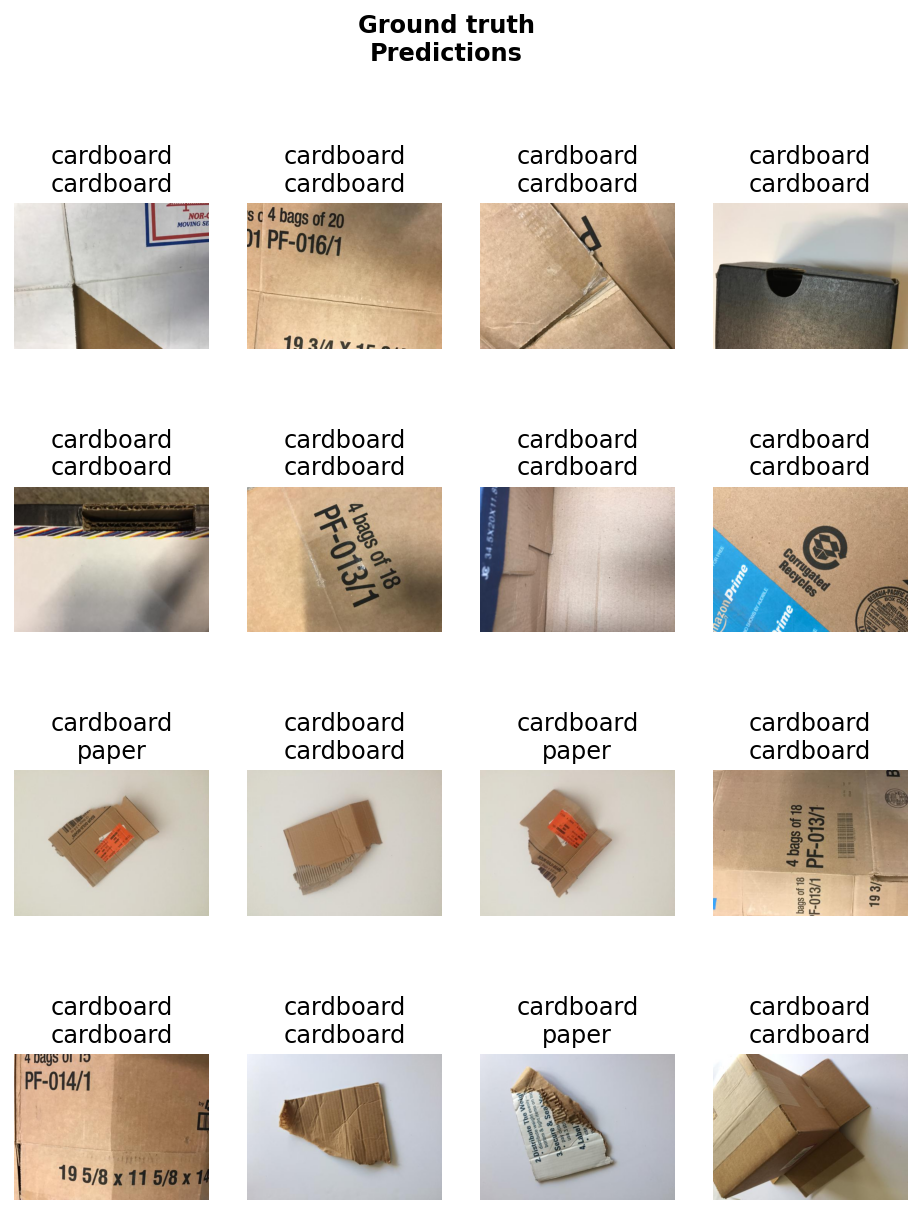

In [172]:
learn.show_results(ds_type=DatasetType.Valid, rows=10, figsize=(8,10))

# Note that the text number on the top is the ground truth, or the target label, the one in the 
# middle is the prediction, while the image number on the bottom is the image data itself.

In [173]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [174]:
print(preds[0].shape)
preds[0]

torch.Size([38, 6])


tensor([[1.0000e+00, 1.3378e-09, 7.2013e-09, 3.7856e-09, 7.4129e-07, 2.0146e-06],
        [9.9663e-01, 9.2507e-06, 3.2808e-03, 5.9470e-05, 1.8635e-07, 2.2100e-05],
        [1.0000e+00, 5.8284e-08, 6.2870e-08, 2.8505e-06, 2.0315e-08, 1.0016e-06],
        [9.1889e-01, 2.3864e-03, 6.1491e-04, 4.1433e-02, 7.9555e-04, 3.5880e-02],
        [9.6047e-01, 2.0030e-03, 8.8952e-04, 2.0319e-02, 9.8726e-04, 1.5331e-02],
        [9.9143e-01, 3.2181e-03, 9.7715e-05, 4.9890e-03, 7.1854e-05, 1.9599e-04],
        [9.4319e-01, 6.9486e-03, 2.5104e-03, 4.4888e-02, 7.6495e-04, 1.6961e-03],
        [9.9956e-01, 1.7603e-07, 2.1358e-05, 1.0442e-06, 1.9183e-06, 4.1596e-04],
        [9.9926e-01, 1.0481e-06, 1.1283e-05, 7.2398e-04, 6.2452e-08, 4.1296e-06],
        [4.0040e-05, 9.7170e-01, 2.7768e-02, 4.0666e-04, 7.5581e-05, 1.2823e-05],
        [4.0428e-05, 5.4995e-02, 1.2293e-02, 3.7757e-04, 9.3015e-01, 2.1405e-03],
        [4.8803e-04, 8.9778e-02, 5.5234e-01, 3.5075e-03, 1.9993e-02, 3.3389e-01],
        [9.1375e

In [175]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [176]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))
max_idxs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 1, 4, 4, 5, 2, 2, 4, 5, 5, 5, 2,
       5], dtype=int64)

In [177]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [178]:
# yhat

In [179]:
# learn.data.test_ds[0][0]

In [180]:
def image_type(filename):
    
    if "cardboard" in filename:
        return 'cardboard'
    elif "glass" in filename:
        return 'glass'
    elif "metal" in filename:
        return 'metal'
    elif "paper" in filename:
        return 'paper'
    elif "plastic" in filename:
        return 'plastic'
    elif "trash" in filename:
        return 'trash'
    
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
#     y[i] = pattern.search(y[i]).group(1)
    true_type = image_type(y[i])
    y[i] = true_type

In [181]:
## predicted values
print(yhat[0:15])
## actual values
print(y[0:15])

['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'glass', 'plastic', 'metal', 'metal', 'metal', 'metal']
['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'glass', 'glass', 'metal', 'metal', 'metal', 'metal']


In [182]:
cm = confusion_matrix(y,yhat)
print(cm)

[[9 0 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 4 0 0 0]
 [1 0 0 9 0 0]
 [0 1 1 0 3 1]
 [0 0 2 0 1 4]]


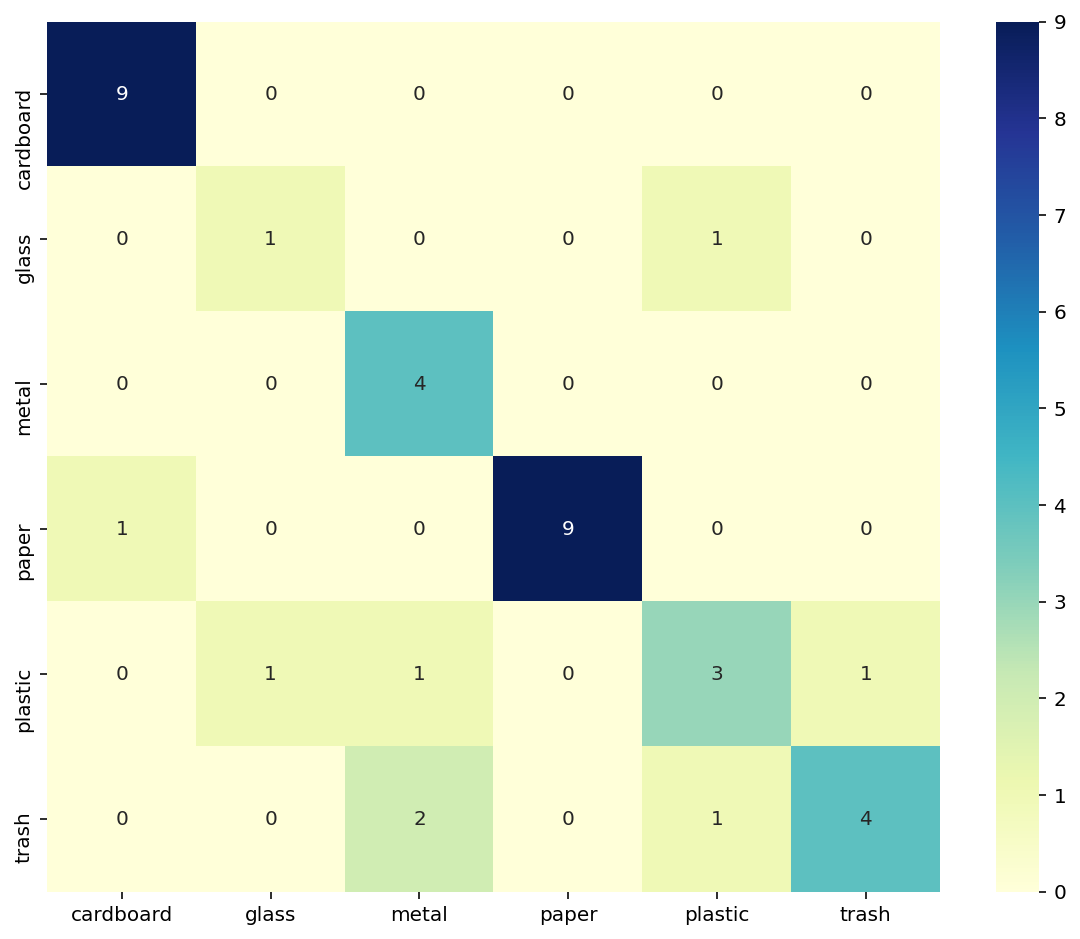

In [183]:
df_cm = pd.DataFrame(cm,waste_types,waste_types)

df_cm
plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

In [184]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
accuracy = correct/sum(sum(cm))
accuracy

0.7894736842105263

In [185]:
learn.export('trained_model.pkl')

In [186]:
path = learn.path
path

WindowsPath('C:/Mun/Spring2020/Course_Study/9804 (ImageProcessingandApplications)/Project/Code/data')

In [187]:
learn = load_learner(path, 'trained_model.pkl')

In [188]:
def load_image(filename):
    img = cv2.imread(os.path.join(predict_dir, filename))
#     img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
#     img = img /255
    
    print(img)
    a,b,c = learn.predict(img)
    print(a) 
 

In [189]:
base_dir = 'data' 
predict_dir = os.path.join(base_dir, 'predict')
predict_dir

IMAGE_SIZE = (224,224)
INPUT_SHAPE = (224,224,3)

In [190]:
onlyfiles = [f for f in listdir(predict_dir) if isfile(join(predict_dir, f))]
onlyfiles

['glass32.jpg', 'paper25.jpg']

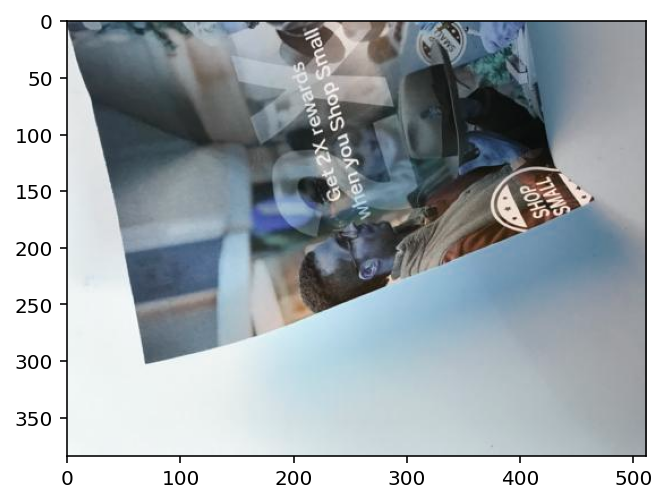

cardboard
tensor(0)
tensor([1.0000e+00, 1.6816e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


In [191]:
path = predict_dir + "\paper25.jpg"
img = cv2.imread(path)

plt.imshow(img)
plt.show()

t = pil2tensor(img, dtype=np.float32) 
im = Image(t)
pred_class,pred_idx,outputs = learn.predict(im)
print(pred_class)
print(pred_idx)
print(outputs)

tensor([1., 0., 0., 0., 0., 0.])
tensor([1.0000e+00, 1.6816e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


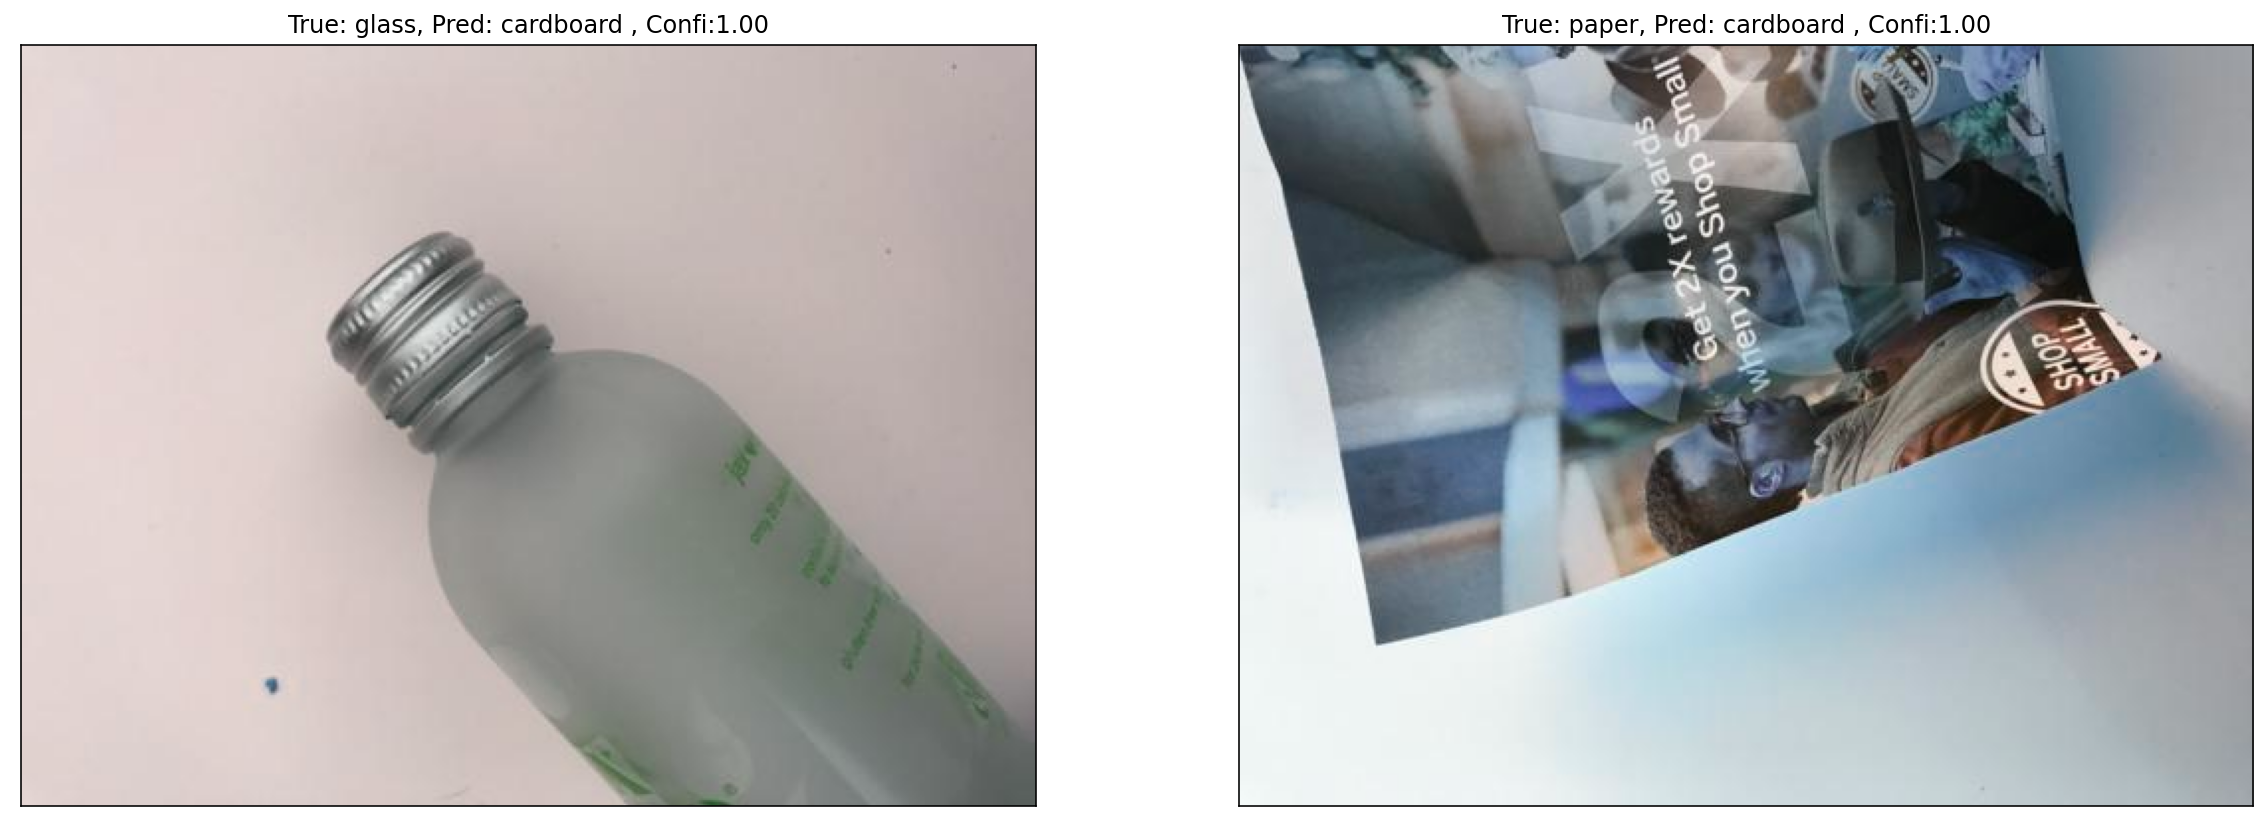

In [192]:
def predict(file_name):
    path = predict_dir + "\\" + file_name 
    img = cv2.imread(path)

    t = pil2tensor(img, dtype=np.float32) 
    im = Image(t)
    pred_class,pred_idx,outputs = learn.predict(im)
    return pred_class,pred_idx,outputs,img


def plot_predicted_label_1(nrows, ncols,onlyfiles):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 20))
    
    rs = np.random.choice(len(onlyfiles), nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        true_type = image_type(onlyfiles[i])
        prediction,pred_idx,outputs,img = predict(onlyfiles[i])
         
        print(outputs)
        title = 'True: %s, Pred: %s , Confi:%0.2f' % (true_type,prediction,outputs[pred_idx])
        ax.imshow(img, cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])
        
# ploat image with predicted and actual value
num_rows = 1
num_cols = 2
plot_predicted_label_1(num_rows, num_cols,onlyfiles)
    